<a href="https://colab.research.google.com/github/sonvt8/sonvt8-OCR-Tutorial/blob/main/OCR_Tyserract_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cài đặt Tyserract
- Thư viện: https://pypi.org/project/pytesseract/

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


## Nhận diện chữ cơ bản

### Cấu hình đường dẫn

In [ ]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

drive_root = '/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract' # Colab tommyselflearning@gmail.com
print("Thư mục gốc MyDrive là:", drive_root)
print("Danh sách các thư mục bên trong:")

# In danh sách file/thư mục
for item in os.listdir(drive_root):
    print("  -", item)

# Tạo thư mục lưu trữ ảnh và chứa các ảnh trong project này
img_dir = os.path.join(drive_root, 'imgs')
os.makedirs(img_dir, exist_ok=True)

print("Đường dẫn ảnh lưu:", img_dir)

Thư mục gốc MyDrive là: /content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract
Danh sách các thư mục bên trong:
  - imgs
  - .ipynb_checkpoints
  - tessdata
  - fonts
  - OCR_Tyserract.ipynb
Đường dẫn ảnh lưu: /content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/imgs


### Chữ tiếng Anh nền trắng - thư viện mặc định

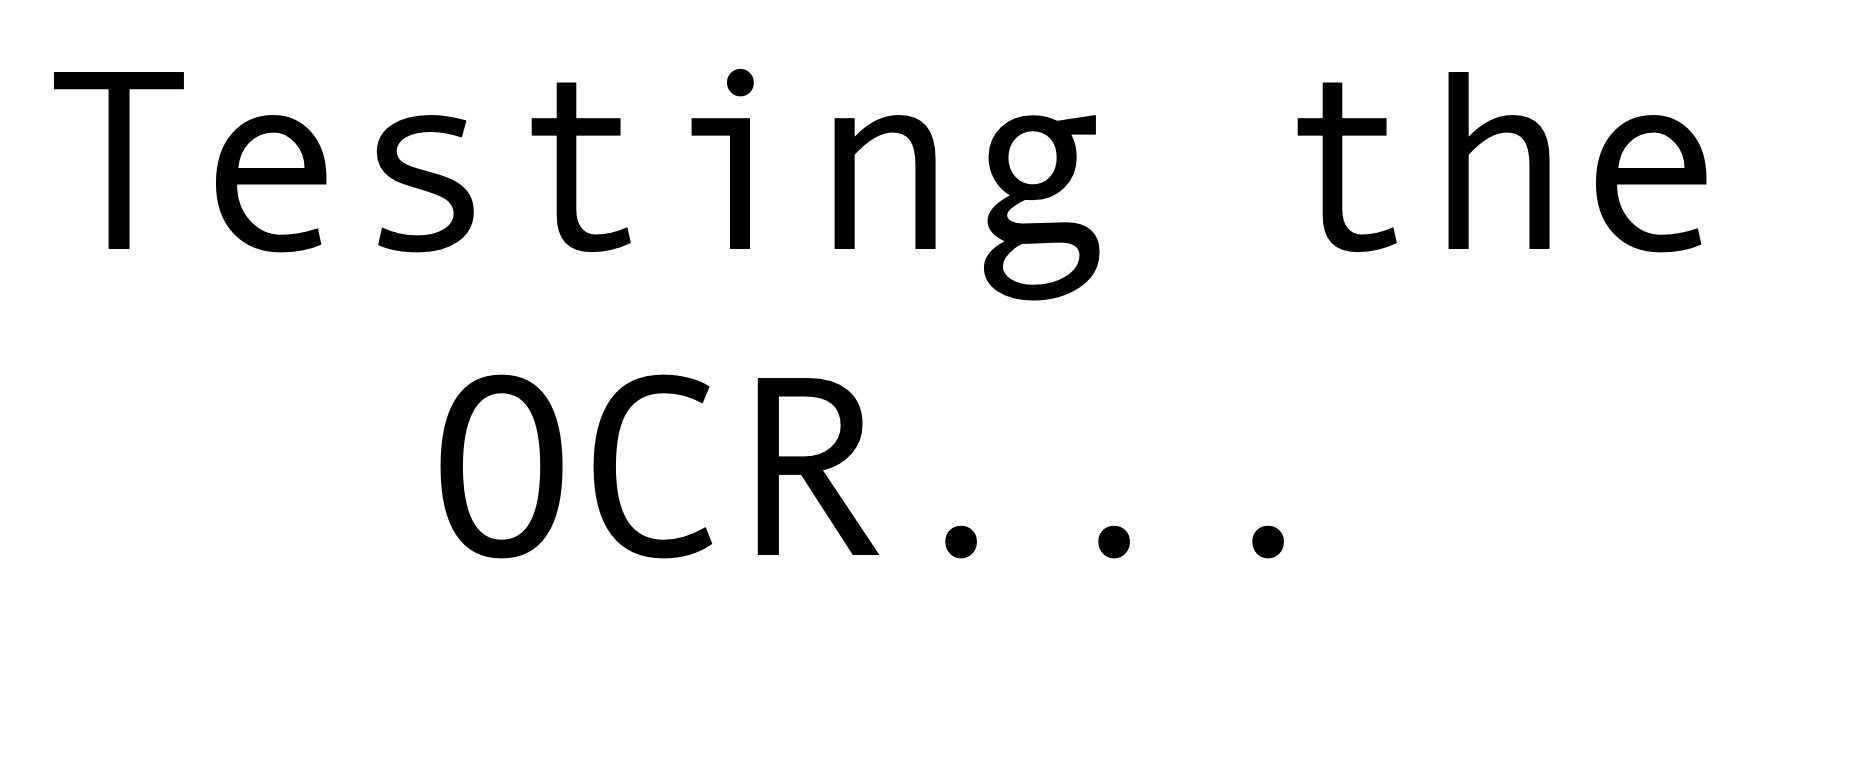

Testing the
OCR...



In [ ]:
img01 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/imgs/test01.jpg')
test01 = cv2.cvtColor(img01, cv2.COLOR_BGR2RGB) # BGR -> RGB
cv2_imshow(test01)
text01 = pytesseract.image_to_string(test01)
print(text01)

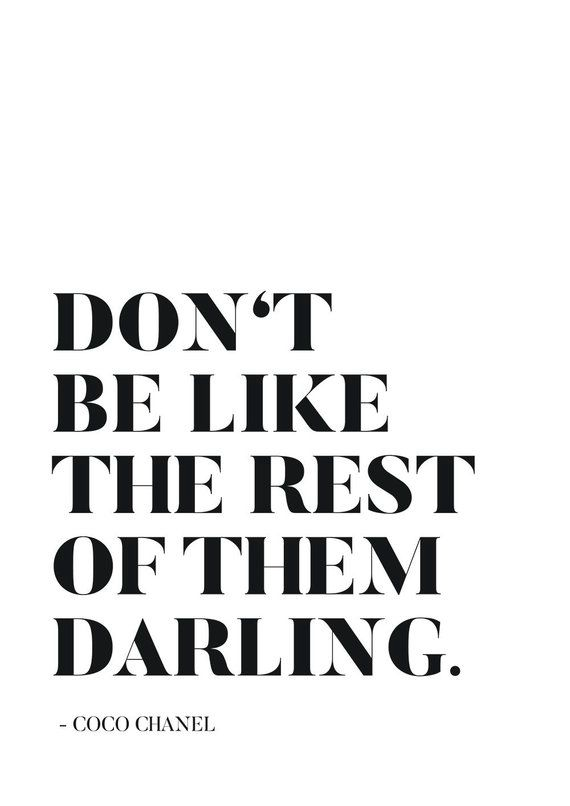

DONT

BE LIKE
THE REST
OF THEM
DARLING.



In [ ]:
img02 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/imgs/test02.jpg')
test02 = cv2.cvtColor(img02, cv2.COLOR_BGR2RGB) # BGR -> RGB
cv2_imshow(test02)
text02 = pytesseract.image_to_string(test02)
print(text02) # sẽ có lỗi hiển thị với text block

### Dùng thư viện language của Tyserract

In [ ]:
!tesseract --list-langs

List of available languages (3):
eng
osd
vie


In [ ]:
# Tạo thư mục chứa các dữ liệu đã được pretrained cho từng ngôn ngữ
tyserr_dir = os.path.join(drive_root, 'tessdata')
os.makedirs(tyserr_dir, exist_ok=True)

In [ ]:
eng_path = os.path.join(tyserr_dir, 'eng.traineddata')
!wget -O "{eng_path}" "https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true"

--2025-08-02 15:01:42--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata [following]
--2025-08-02 15:01:42--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata [following]
--2025-08-02 15:01:42--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.1

In [ ]:
config_tesseract = f'--tessdata-dir {tyserr_dir}'
text = pytesseract.image_to_string(test02, lang='eng', config=config_tesseract)
print(text) #Vẫn lỗi hiển thị, mặc dù đã sử dụng thư viện được trained

DON‘T

BE LIKE
THE REST
OF THEM
DARLING.



#### Các modes (PSM)

In [ ]:
!tesseract --help-psm # Các chế độ phân tích bố cục trang của Tesseract khi xử lý ảnh văn bản

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [ ]:
config_tesseract = f'--tessdata-dir {tyserr_dir} --psm 6'
text = pytesseract.image_to_string(test02, lang='eng', config=config_tesseract)
print(text)

DON‘T

BE LIKE
THE REST
OF THEM
DARLING.



### Nhận diện chữ Tiếng Việt nền trắng

In [ ]:
# vie_path = os.path.join(tyserr_dir, 'vie.traineddata')
# !wget -O "{vie_path}" "https://github.com/tesseract-ocr/tessdata/raw/main/vie.traineddata?raw=true"

vie_path_best = os.path.join(tyserr_dir, 'vie.traineddata')
!wget -O "{vie_path_best}" "https://github.com/tesseract-ocr/tessdata_best/raw/main/vie.traineddata?raw=true"

--2025-08-02 15:01:46--  https://github.com/tesseract-ocr/tessdata_best/raw/main/vie.traineddata?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/vie.traineddata [following]
--2025-08-02 15:01:46--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/vie.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12435550 (12M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/tessdata/vie.traineddata’

/content/drive/MyDr 100%[===================>]  11.86M  24.7MB/s    in 0.5s    

2025-08-02 15:01

In [ ]:
!apt-get install tesseract-ocr-vie
!tesseract --list-langs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-vie is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
List of available languages (3):
eng
osd
vie


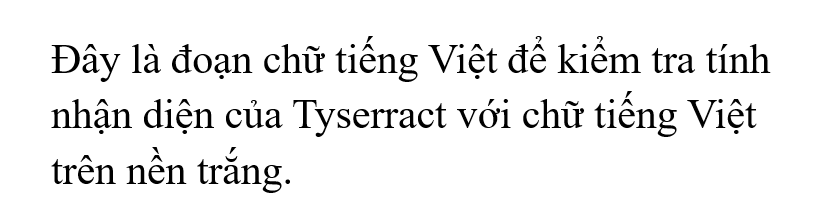

Cách 1: Sử dụng cấu hình PSM
Day 1a doan chit tiéng Viét dé kiém tra tinh
nhan dién cua Tyserract voi chit tiéng Viét
trén nén trang.

Cách 2: Sử dụng cấu hình PSM
Đây là đoạn chữ tiếng Việt đề kiểm tra tính
nhận diện của Tyserract với chữ tiếng Việt
trên nền trắng.



In [ ]:
img03 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/imgs/tieng_viet_nen_trang.png')
test03 = cv2.cvtColor(img03, cv2.COLOR_BGR2RGB) # BGR -> RGB
cv2_imshow(test03)

print("=="*20)
print("Cách 1: Sử dụng cấu hình PSM")
text03 = pytesseract.image_to_string(test03)
print(text03) # Đọc ảnh không qua cấu hình thất bại

print("=="*20)
print("Cách 2: Sử dụng cấu hình PSM")

config_tesseract = f'--tessdata-dir {tyserr_dir} --psm 6 -l vie'
text03 = pytesseract.image_to_string(test03, lang='vie', config=config_tesseract)
print(text03) # Có nhận diện được chữ tiếng Việt.


## Khoanh vùng chữ

In [ ]:
from pytesseract import Output

### Các tham số thông tin

In [ ]:
config_tesseract = f'--tessdata-dir {tyserr_dir}'
result = pytesseract.image_to_data(test01, config=config_tesseract, lang='eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 2],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441, 974],
 'top': [0, 69, 69, 69, 69, 72, 375, 370, 370],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 534, 161],
 'height': [763, 489, 489, 231, 231, 180, 183, 239, 239],
 'conf': [-1, -1, -1, -1, 88, 92, -1, 89, 90],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR.', '..']}

- block_num = Current block number. When Tesseract performs the detections, it divides the image into several regions, which can vary according to the PSM parameters and also other criteria of the algorithm. Each block is a region

- conf = prediction confidence (from 0 to 100. -1 means no text was recognized)

- height = height of detected block of text (bounding box)

- left = x coordinate where the bounding box starts

- level = the level corresponds to the category of the detected block. There are 5 possible values:
  1. page
  2. block
  3. paragraph
  4. line
  5. word

Therefore, if 5 is returned, it means that the detected block is text, if it was 4, it means that a line was detected

- line_num = line number (starts from 0)

- page_num = the index of the page where the item was detected

- text = the recognition result

- top = y-coordinate where the bounding box starts

- width = width of the current detected text block

- word_num = word number (index) within the current block




In [ ]:
result['text'], len(result['text'])

(['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'], 9)

### Hàm đóng khung text

In [ ]:
def bouding_box(result, img, i, color = (255,100,0)):
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2) # 2 là thick

  return x, y, img

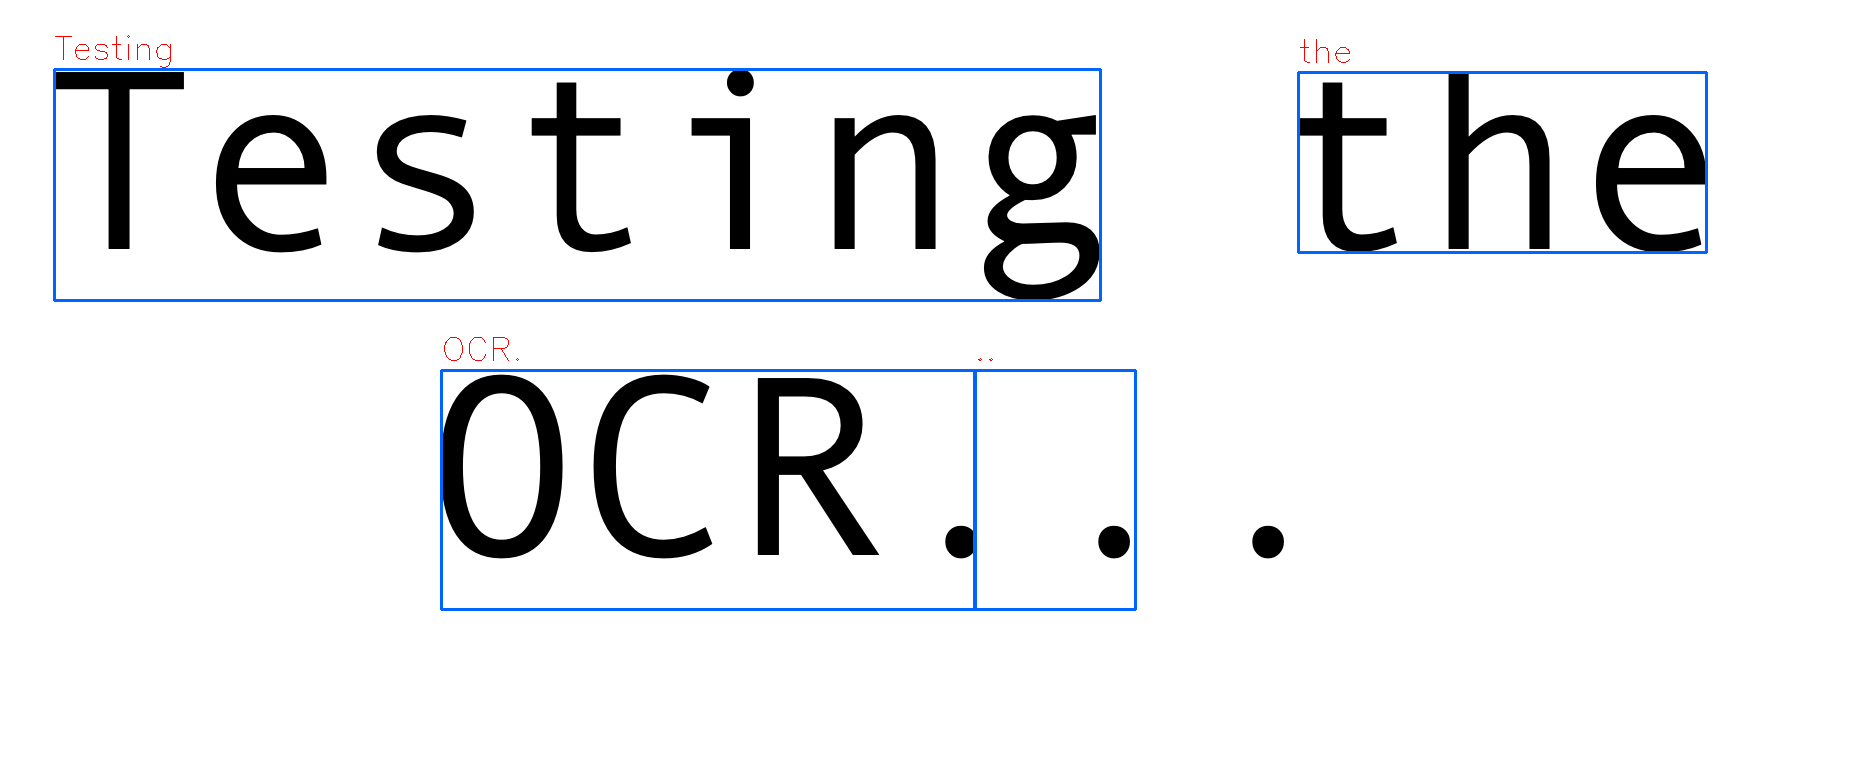

In [ ]:
min_confidence = 40
img_copy = test01.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    # print(confidence)
    x, y, img = bouding_box(result, img_copy, i)
    # print(x,y)
    text = result['text'][i]
    cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)

## Kỹ thuật khoanh vùng và hiển thị chữ

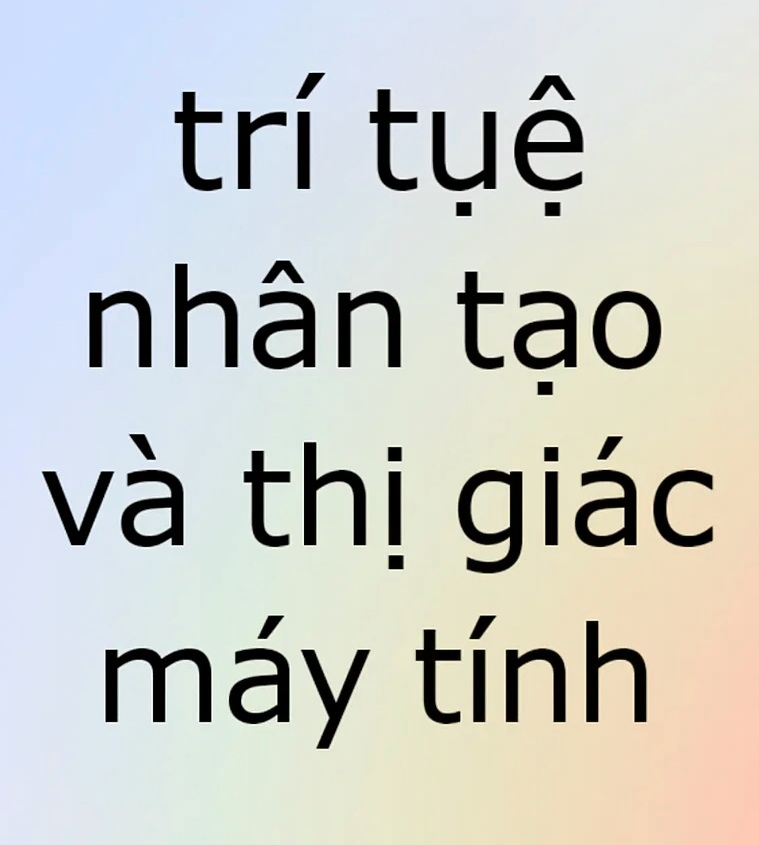

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/imgs/tieng_viet_rgb.jpg')
img_tv1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img_tv1)

In [ ]:
vie_path_best = os.path.join(tyserr_dir, 'vie.traineddata')
!wget -O "{vie_path_best}" "https://github.com/tesseract-ocr/tessdata_best/raw/main/vie.traineddata?raw=true"

--2025-08-02 15:01:56--  https://github.com/tesseract-ocr/tessdata_best/raw/main/vie.traineddata?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/vie.traineddata [following]
--2025-08-02 15:01:56--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/vie.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12435550 (12M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/tessdata/vie.traineddata’

/content/drive/MyDr 100%[===================>]  11.86M  43.1MB/s    in 0.3s    

2025-08-02 15:01

In [ ]:
def write_text(text, x, y, img, font_path="calibri.ttf", font_size=20):
  """
  Hàm này nhận vào text và tọa độ, sau đó vẽ text đó lên ảnh.
  font_path: Đường dẫn tới file .ttf của font bạn muốn dùng.
  """
  try:
    # Tải font từ file .ttf với kích thước mong muốn
    font = ImageFont.truetype(font_path, font_size)
  except IOError:
    print(f"Lỗi: Không tìm thấy file font tại '{font_path}'. Sử dụng font mặc định.")
    # Nếu không tìm thấy font, Pillow sẽ dùng một font mặc định (có thể không hỗ trợ tiếng Việt)
    font = ImageFont.load_default()

  # Chuyển đổi ảnh từ OpenCV (numpy array) sang Pillow Image
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)

  # Vẽ chữ lên ảnh. Tọa độ (x, y - font_size) giúp chữ hiện ngay phía trên bounding box
  draw.text((x, y - font_size), text, font=font, fill=(0, 0, 255)) # Thêm màu đỏ cho dễ thấy

  # Chuyển đổi lại từ Pillow Image sang OpenCV (numpy array) để xử lý tiếp
  img = np.array(img_pil)
  return img

In [ ]:
def bouding_box(result, img, i, color = (255,100,0)):
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

  return x, y, img

### Sử dụng PIL và Font để hiển thị text tiếng Việt

In [ ]:
from PIL import ImageFont, ImageDraw, Image
font_path = '/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/fonts/calibri.ttf'

In [ ]:
config_tesseract = f'--tessdata-dir {tyserr_dir} --oem 3 --psm 11'
result = pytesseract.image_to_data(img_tv1, config=config_tesseract, lang = 'vie', output_type = Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4],
 'par_num': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  1,
  2,
  3,
  0,
  0,
  0,
  1,
  2],
 'left': [0,
  175,
  175,
  175,
  175,
  370,
  89,
  89,
  89,
  89,
  380,
  42,
  42,
  42,
  42,
  244,
  458,
  105,
  105,
  105,
  105,
  416],
 'top': [0,
  73,
  73,
  73,
  73,
  75,
  261,
  261,
  261,
  257,
  272,
  434,
  434,
  434,
  434,
  442,
  436,
  616,
  616,
  616,
  616,
  616],
 'width': [759,
  408,
  408,
  408,
  15

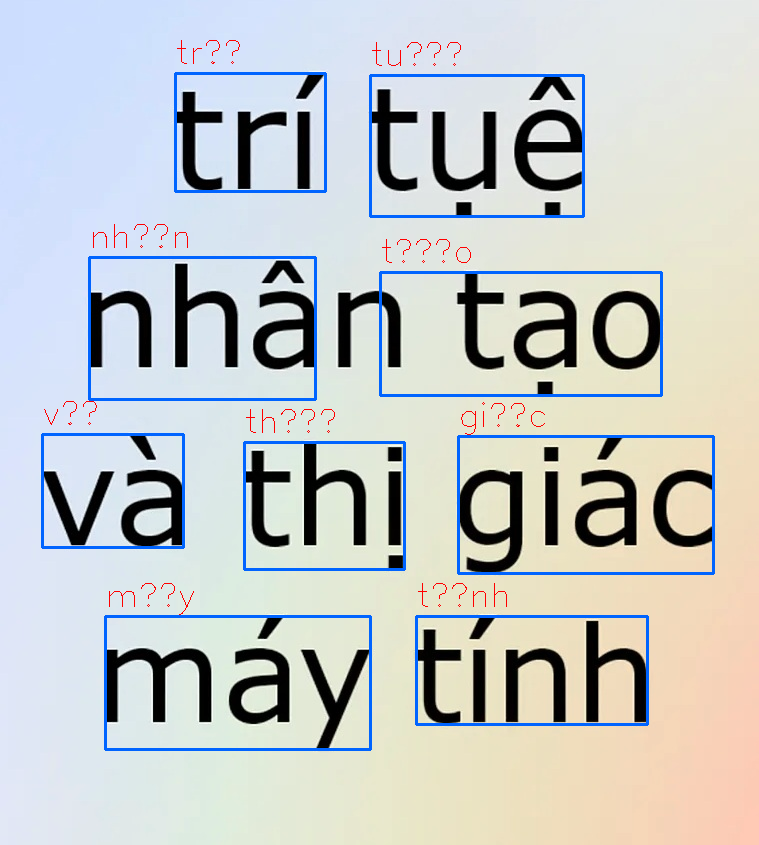

In [ ]:
min_confidence = 40
img_copy = img_tv1.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence and result['level'][i] == 5:
    x, y, img = bouding_box(result, img_copy, i)
    text = result['text'][i]
    cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)
# Kết quả: Sai font nên không hiển thị đúng tiếng việt

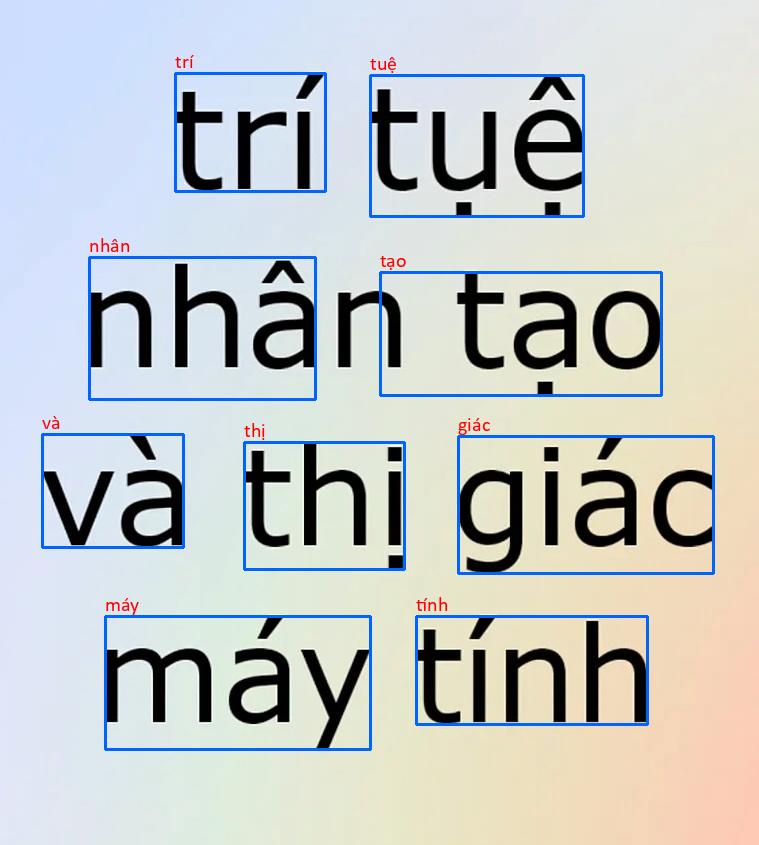

In [ ]:
min_confidence = 40
img_copy = img_tv1.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  # Chỉ xử lý khi confidence đạt yêu cầu VÀ đối tượng là một từ (level 5)
  if confidence > min_confidence and result['level'][i] == 5:
    x, y, img = bouding_box(result, img_copy, i)
    text = result['text'][i]
    img_copy = write_text(text, x, y, img_copy, font_path)
cv2_imshow(img_copy)
# Kết quả hiện thị bên dưới với 2 từ "nhân" và "tạo" đang có bounding box sai vị trí mặc dù vẫn nhận diện tốt các word
# Giải pháp là phải tiền xử lý ảnh để tesseract xử lý tốt hơn

### Áp dụng ngưỡng OTSU

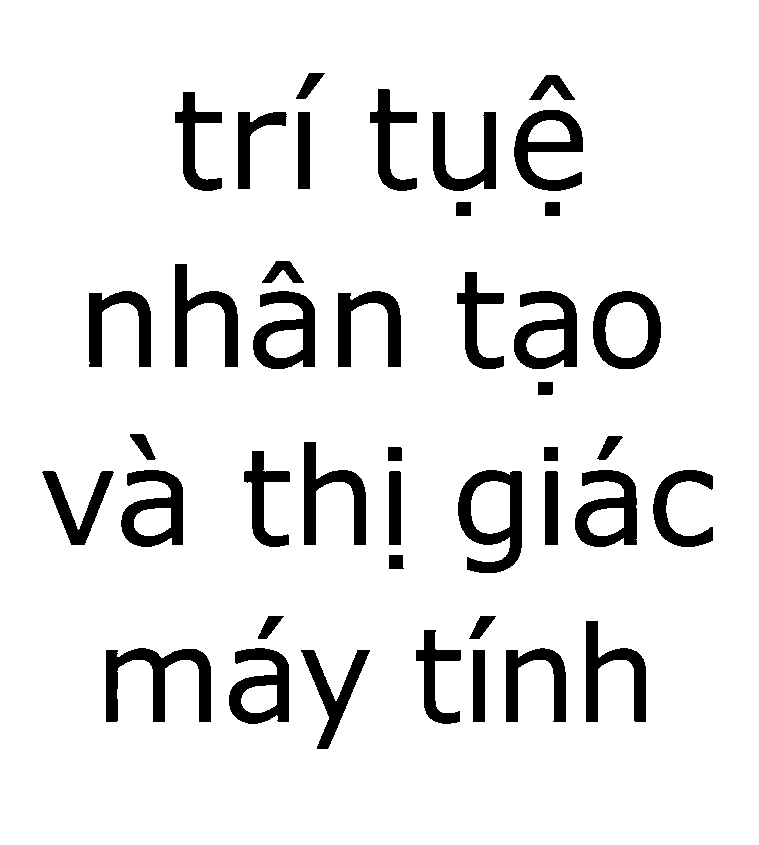

In [ ]:
# 1. Chuyển ảnh gốc sang ảnh xám
gray_img = cv2.cvtColor(img_tv1, cv2.COLOR_RGB2GRAY)

# 2. Áp dụng ngưỡng nhị phân hóa
# Các pixel > ngưỡng sẽ thành 255 (trắng), còn lại thành 0 (đen)
# THRESH_BINARY_INV làm cho chữ thành màu trắng và nền thành màu đen
# THRESH_OTSU tự động tìm giá trị ngưỡng tốt nhất
_, adaptive_otsu = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2_imshow(adaptive_otsu)

### Áp dụng ngưỡng Mean

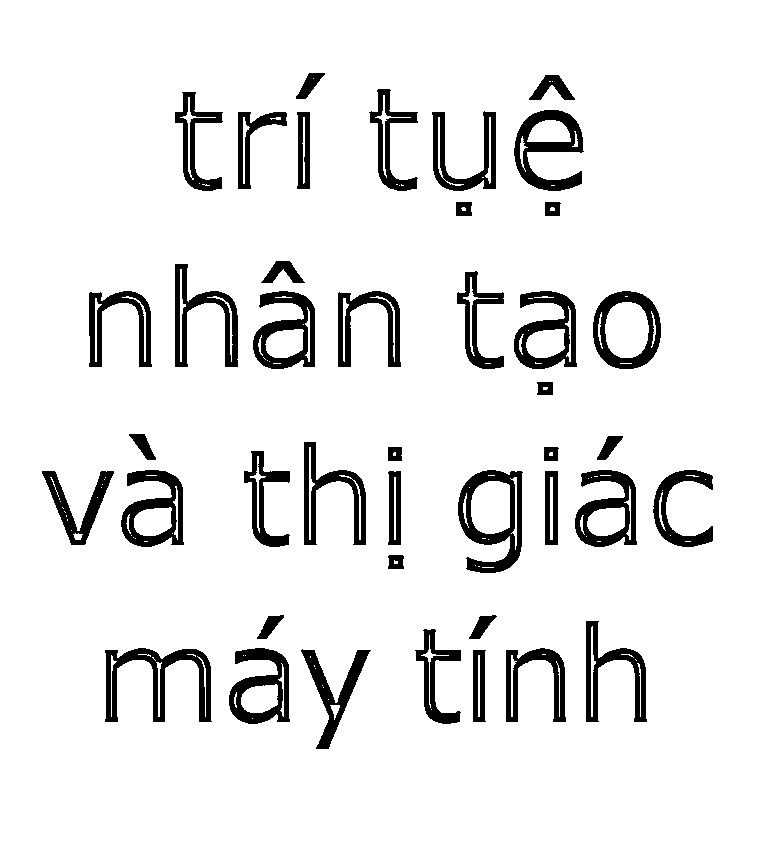

In [ ]:
adaptive_average = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_average)

### Áp dụng ngưỡng Gaussian

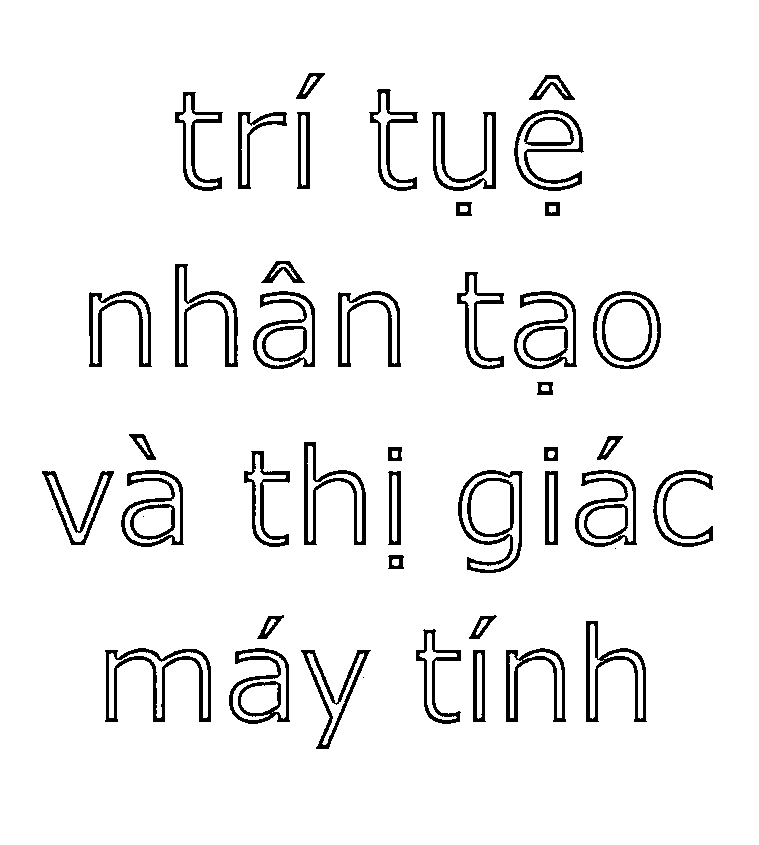

In [ ]:
adaptive_gaussian = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive_gaussian)

In [ ]:
# Chuyển ảnh nhị phân (đen-trắng) thành ảnh 3 kênh màu để vẽ bounding box màu lên
# Thay thế các adaptive khác nhau: adaptive_otsu, adaptive_average, adaptive_gaussian để tối ưu
binary_img = cv2.cvtColor(adaptive_otsu, cv2.COLOR_GRAY2RGB)

# Chú ý: Có thể điều chỉnh các tham số psm và oem tùy mục đích tối ưu
config_tesseract = f'--tessdata-dir {tyserr_dir} --psm 11 --oem 3'
result = pytesseract.image_to_data(binary_img, config=config_tesseract, lang = 'vie', output_type = Output.DICT)

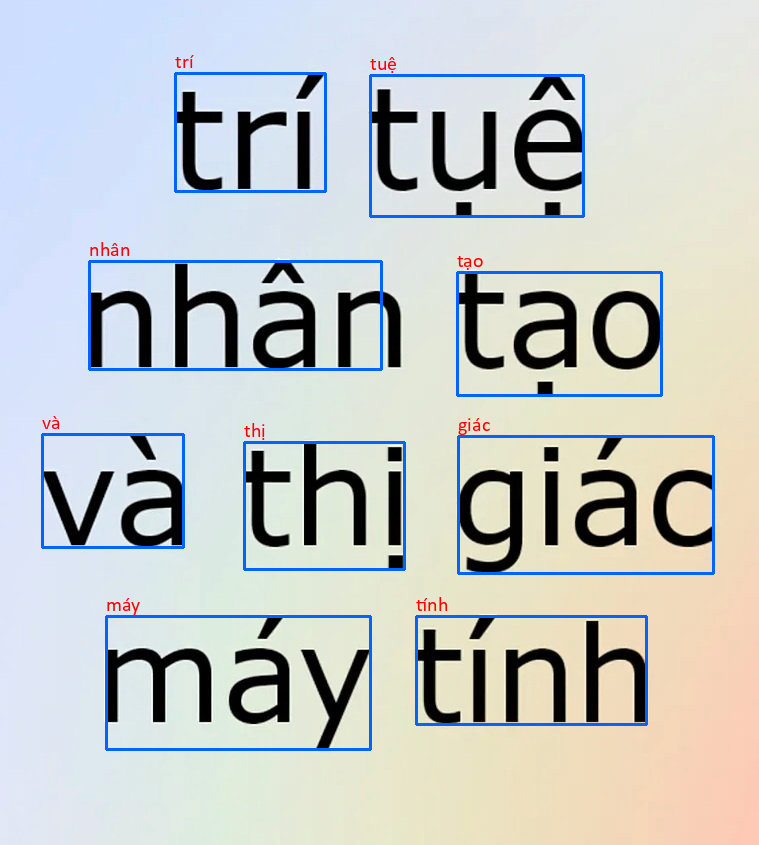

In [ ]:
min_confidence = 40
img_copy = img_tv1.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  # Chỉ xử lý khi confidence đạt yêu cầu VÀ đối tượng là một từ (level 5)
  if confidence > min_confidence and result['level'][i] == 5:
    x, y, img = bouding_box(result, img_copy, i)
    text = result['text'][i]
    img_copy = write_text(text, x, y, img_copy, font_path)
cv2_imshow(img_copy)
# Kết quả: Việc sử dụng otsu vẫn cho kết quả chấp nhận được
# Việc sử dụng Gaussian và Mean sẽ dùng tốt trong các văn bản có độ lệch sáng cao.

# Nhận diện text có cấu trúc cụ thể

In [ ]:
import re # regular expressions

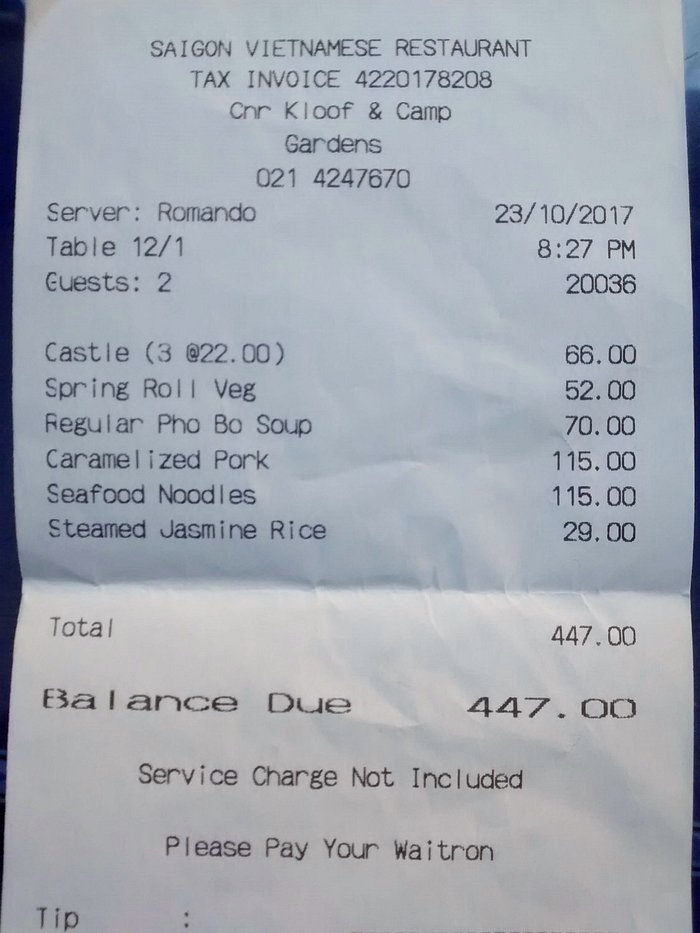

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/imgs/the-bill.jpg')
bill = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(bill)

In [ ]:
config_tesseract = f'--tessdata-dir {tyserr_dir} --psm 6 --oem 3'
result = pytesseract.image_to_data(bill, config=config_tesseract, lang = 'eng', output_type = Output.DICT)

In [ ]:
# https://regexr.com/
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

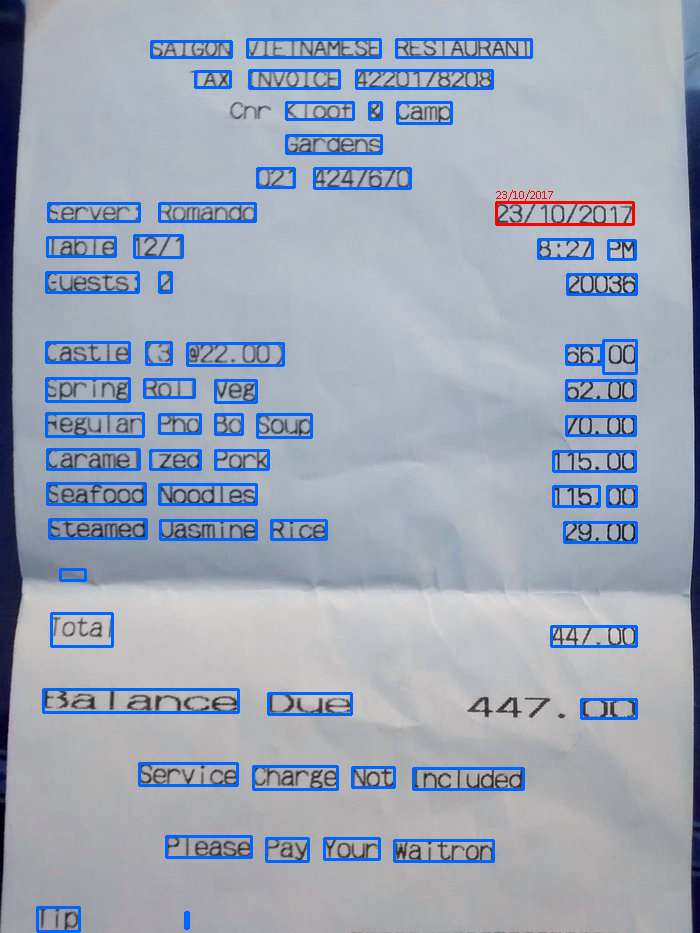

In [ ]:
dates = []
min_confidence = 40
img_copy = bill.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence and result['level'][i] == 5:
    text = result['text'][i]
    if re.match(date_pattern, text):
      x, y, img = bouding_box(result, img_copy, i, (0,0,255))
      img_copy = write_text(text, x, y, img_copy, font_path, 12)
      dates.append(text)
    else:
      x, y, img_copy = bouding_box(result, img_copy, i)
cv2_imshow(img_copy)


## Nhận diện text trên vật thể

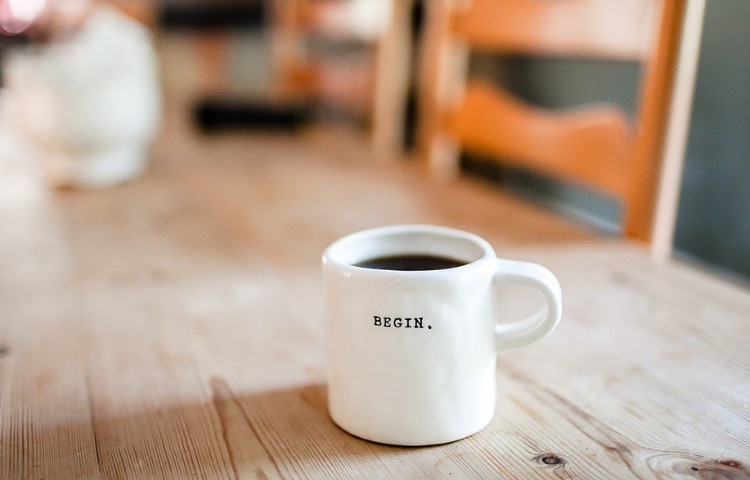

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/OCR_Tyserract/imgs/the-cup.jpg')
cup = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(cup)


In [ ]:
config_tesseract = f'--tessdata-dir {tyserr_dir} --psm 12'
result = pytesseract.image_to_data(cup, config=config_tesseract, lang = 'eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4],
 'par_num': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0,
  0,
  0,
  0,
  0,
  145,
  374,
  374,
  374,
  374,
  169,
  169,
  169,
  169,
  287,
  287,
  287,
  287,
  360],
 'top': [0,
  0,
  0,
  0,
  25,
  0,
  316,
  316,
  316,
  316,
  397,
  397,
  397,
  397,
  404,
  404,
  404,
  444,
  399],
 'width': [750,
  642,
  642,
  642,
  54,
  497,
  58,
  58,
  58,
  58,
  69,
  69,
  69,
  69,
  178,
  178,
  178,
  28,
  52],
 'height': [480,
  161,
  161,
  161,
  64,
  161,
  13,
  13,
  13,
  13,
  83,
  83,
  83,
  83,
  61,
  61,
  61,
  21,
  77],
 'conf': [-1,
  -1,
  -1,
  -1,
  35,
  12,
  -

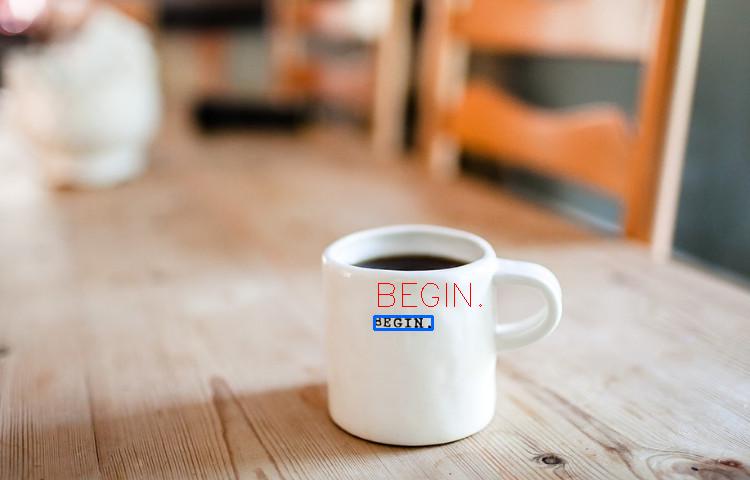

In [ ]:
min_confidence = 40
img_copy = cup.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    text = result['text'][i]
    if not text.isspace() and len(text) > 0:
      x, y, img = bouding_box(result, img_copy, i)
      cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)